In [1]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X = mnist['data']
y = mnist['target']

In [12]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def plot_digits(X):
    some_digit = X
    some_digit = np.array(some_digit)
    some_digit_pic = some_digit.reshape(28, 28)
    fig = plt.figure
    plt.imshow(some_digit_pic, cmap='binary')
    plt.show()

# Binary Classification

In [7]:
some_digit = X.iloc[[0]].values.tolist()

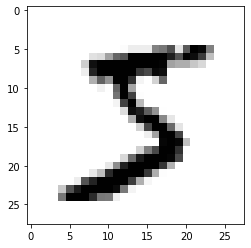

In [8]:
plot_digits(some_digit)

In [9]:
y[0]

'5'

In [10]:
y = y.astype(np.uint8)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
y_train_5

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict(some_digit)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
sk = StratifiedKFold(n_splits=3, shuffle=True,random_state=42)
n_correct_tot = 0

for train_index, test_index in sk.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_folds, y_test_fold = y_train_5[train_index], y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    n_correct_tot += n_correct / len(y_pred)
    print(n_correct / len(y_pred))
print(n_correct_tot/sk.n_splits)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # == 4096 / (4096 + 1522)

recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
print(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_probas_forest[:,1]

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
y_scores_forest = (y_scores_forest > 0.5)
y_scores_forest

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_scores_forest))

recall_score(y_train_5, y_scores_forest)

# End of Binary Classification

# -------------------------------------------------------------------------------------

# Multiclass Classification

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict(some_digit)

In [ ]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.classes_[5]

In [ ]:
# Takes Much Time
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(some_digit)

In [ ]:
sgd_clf.decision_function(some_digit)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict(some_digit)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[0]])

In [ ]:
plot_digits([X_test_mod.iloc[0]])

In [ ]:
plot_digits(clean_digit)

In [ ]:
kn_clf = KNeighborsClassifier()

In [ ]:
cross_val_score(kn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
def GSCV(X_train, y_train, X_test, y_test):
    estimator_KNN = KNeighborsClassifier()
    parameters_KNN = {
        'n_neighbors': (3, 5, 10),
        'leaf_size': (1, 20, 40),
        'p': (1, 2),
    }
    grid_search_KNN = GridSearchCV(estimator=estimator_KNN, 
                                    param_grid=parameters_KNN,
                                    scoring = 'accuracy',
                                    cv = 3
                                    )
    KNN_1=grid_search_KNN.fit(X_train, y_train)
    y_pred_KNN1 =KNN_1.predict(X_test)
    print(grid_search_KNN.best_params_ ) 
    print('Best Score - KNN:', grid_search_KNN.best_score_ )
    
GSCV(X_train, y_train, X_test, y_test)

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
knn_clf = KNeighborsClassifier()
weight_options = ['uniform', 'distance']
k_range = list(range(4, 11))
param_dist = dict(n_neighbors=k_range, weights=weight_options)
grid_search_KNN = RandomizedSearchCV(estimator=knn_clf, 
                                    param_distributions=param_dist,
                                    scoring = 'accuracy',
                                    cv = 3)
KNN_1=grid_search_KNN.fit(X_train, y_train)
print(grid_search_KNN.best_params_ ) 
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'weights': 'distance', 'n_neighbors': 4}
Best Score - KNN: 0.9703500000000002


In [26]:
from sklearn.neighbors import KNeighborsClassifier
para = {'weights': 'distance', 'n_neighbors': 4}
knn_clf = KNeighborsClassifier(**para)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [27]:
y_knn_pred = knn_clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

# --------------------------------------------------------------------------------------

In [188]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train.values]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(X_train_augmented, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [191]:
len(X_train_augmented) # 60,000 * 5

300000

In [193]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

300000

In [194]:
knn_clf.fit(X_train_augmented, y_train_augmented)
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.9763

# ------------------------------------------------------------

In [14]:
X = mnist['data']
y = mnist['target']

y = y.astype(np.uint8)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
SC = StandardScaler()
X_train[X.columns] = SC.fit_transform(X_train[X.columns])
X_test[X.columns] = SC.transform(X_test[X.columns])

In [18]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
# Takes to much
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#svc = SVC()
#param_grid = {'C': [0.1, 1, 10],'gamma': [1, 0.1, 0.01],'kernel': ['rbf']}
#grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid,scoring = 'accuracy',cv = 3)
#svc_1 = grid_search_svc.fit(X_train, y_train)
#print(grid_search_svc.best_params_ ) 
#print('Best Score - SVC:', grid_search_svc.best_score_ )

In [20]:
model = SVC(kernel='rbf', C=10, gamma=1, degree=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

In [26]:
model2 = LinearSVC(random_state=42)
model2.fit(X_train, y_train)
y_pred_2 = model2.predict(X_train)
accuracy_score(y_train, y_pred_2)

0.9214

In [27]:
y_pred_2_test = model2.predict(X_test)
accuracy_score(y_test, y_pred_2_test)

0.9121

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal, uniform
#It takes much time
param_distribs =[
    {
        'kernel': ['rbf','poly'],
        "gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10),
        'degree': [2, 3, 4]
    },
    {
        'kernel': ['linear','sigmoid'],
        "gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)
    }
]
model = SVC()

rnd_srch = RandomizedSearchCV(estimator=model, param_distributions=param_distribs, n_iter=10, cv=3, scoring='accuracy',
                                verbose=2, random_state=42)

In [ ]:
rnd_srch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=8.965429868602328, degree=4, gamma=0.029106359131330688, kernel=rbf; total time=66.7min
[CV] END C=8.965429868602328, degree=4, gamma=0.029106359131330688, kernel=rbf; total time=67.5min


In [22]:
model = SVC(C=3.8786881587000437, gamma=0.0017076019229344522)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9978166666666667

In [24]:
y_pred_final = model.predict(X_test)
accuracy_score(y_test, y_pred_final)

0.9717

# -------------------------------------------------------------------

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']

y = y.astype(np.uint8)

In [5]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=10000)

In [6]:
len(X_train1)

60000

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=10000)
len(X_train)

50000

In [17]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
scores = []
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train, y_train)
y_svc = svc_model.predict(X_val)
scores.append(accuracy_score(y_val, y_svc))

C:\ProgramData\Anaconda3\envs\books\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)
y_rfc = rfc_model.predict(X_val)
scores.append(accuracy_score(y_val, y_rfc))

In [12]:
etc_model = ExtraTreesClassifier(random_state=42)
etc_model.fit(X_train, y_train)
y_etc = etc_model.predict(X_val)
scores.append(accuracy_score(y_val, y_etc))

In [13]:
scores

[0.8671, 0.9668, 0.9692]

In [14]:
sum(scores)/3

0.9343666666666666

In [15]:
eclf = VotingClassifier(estimators=[('svc', svc_model), ('rfc', rfc_model), ('etc', etc_model)], voting='hard')

In [16]:
eclf.fit(X_train, y_train)
y_eclf = eclf.predict(X_val)
accuracy_score(y_val, y_eclf)

C:\ProgramData\Anaconda3\envs\books\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.966

In [29]:
eclf2 = VotingClassifier(estimators=[('rfc', rfc_model), ('etc', etc_model)], voting='soft')
eclf2.fit(X_train, y_train)
y_eclf2 = eclf2.predict(X_val)
accuracy_score(y_val, y_eclf2)

0.9692

In [30]:
eclf2 = VotingClassifier(estimators=[('rfc', rfc_model), ('etc', etc_model)], voting='hard')
eclf2.fit(X_train, y_train)
y_eclf2 = eclf2.predict(X_val)
accuracy_score(y_val, y_eclf2)

0.9685

In [31]:
eclf2.score(X_test, y_test)

0.9732

In [33]:
predictions = []
y_svc = svc_model.predict(X_val)
y_rfc = rfc_model.predict(X_val)
y_etc = etc_model.predict(X_val)

In [34]:
predictions.extend([y_svc, y_rfc, y_etc])

In [54]:
predictions[0].reshape(-1, 1).shape

(10000, 1)

In [56]:
y_val.shape

(10000,)

In [63]:
blending_scores = []
for fold, pred in enumerate(predictions):
    print(f'fold number: {fold+1}')
    rfc_model.fit(pred.reshape(-1, 1), y_val)
    score = rfc_model.predict(pred.reshape(-1, 1))
    blending_scores.append(accuracy_score(y_val, score))

fold number: 1
fold number: 2
fold number: 3


In [65]:
sum(blending_scores)/3

0.9343666666666666

In [67]:
# Without SVM
predictions = []
predictions.extend([y_rfc, y_etc])
blending_scores = []
for fold, pred in enumerate(predictions):
    print(f'fold number: {fold+1}')
    rfc_model.fit(pred.reshape(-1, 1), y_val)
    score = rfc_model.predict(pred.reshape(-1, 1))
    blending_scores.append(accuracy_score(y_val, score))
    
sum(blending_scores)/2

fold number: 1
fold number: 2


0.968

In [69]:
rfc_model.fit(X_train, y_train)
y_rfc = rfc_model.predict(X_test)

In [70]:
etc_model.fit(X_train, y_train)
y_etc = etc_model.predict(X_test)

In [71]:
predictions = []
predictions.extend([y_rfc, y_etc])
blending_scores = []
for fold, pred in enumerate(predictions):
    print(f'fold number: {fold+1}')
    rfc_model.fit(pred.reshape(-1, 1), y_test)
    score = rfc_model.predict(pred.reshape(-1, 1))
    blending_scores.append(accuracy_score(y_test, score))

fold number: 1
fold number: 2


In [74]:
sum(blending_scores)/2

0.9728000000000001

### I'm blending and stacking like how I learnt from kaggle.

# --------------------------------------------------

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [8]:
len(X_train)

60000

In [14]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [13]:
start = time.time()
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print(f'train predictions accuracy is:{accuracy_score(y_train, rfc.predict(X_train))}')
y_pred = rfc.predict(X_test)
end = time.time()
tot_time = end-start
print(f'total time: {tot_time}')
print(accuracy_score(y_test, y_pred))

train predictions accuracy is:1.0
total time: 58.356077432632446
0.9727


In [15]:
pca = PCA(n_components=0.95, random_state=42)

In [16]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [17]:
start = time.time()
rfc.fit(X_train_reduced, y_train)
print(f'train predictions accuracy is:{accuracy_score(y_train, rfc.predict(X_train_reduced))}')
y_pred_reduced = rfc.predict(X_test_reduced)
end = time.time()
tot_time = end-start
print(f'total time: {tot_time}')
print(accuracy_score(y_test, y_pred_reduced))

train predictions accuracy is:1.0
total time: 294.67195200920105
0.908


# 2nd Question in Dimensionality Reduction

In [30]:
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)
indices = np.random.permutation(X.shape[0])[:10000]
len(indices)

X_train = X.iloc[indices]
y_train = y[indices]

In [19]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_train)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
X_embedded.shape

(10000, 2)

(-89.68285675048828, 88.00658721923828, -88.27508163452148, 94.14396286010742)

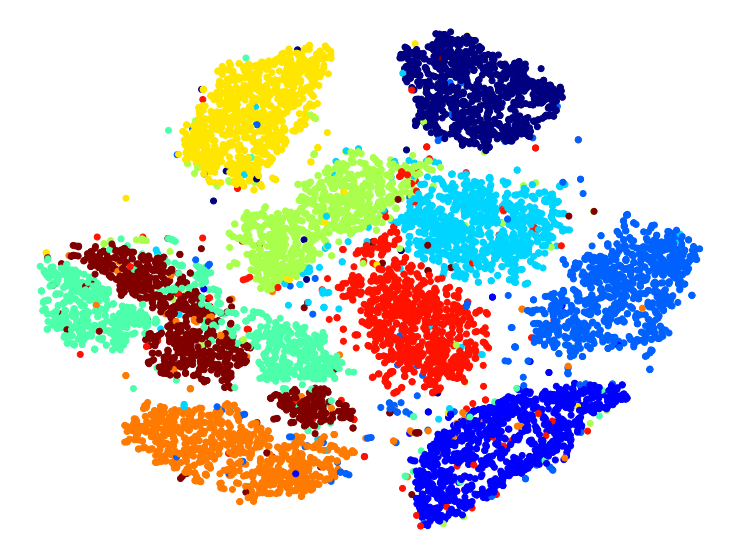

In [62]:
plt.figure(figsize=(13,10))
plt.scatter(x=X_embedded[:,0], y=X_embedded[:,1], c=y_train, cmap='jet')
plt.axis('off')


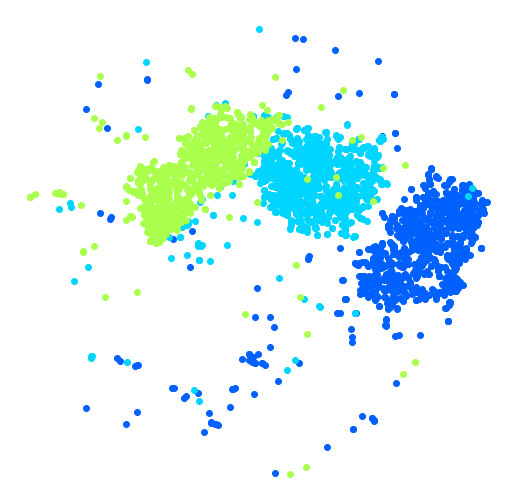

In [65]:
import matplotlib as mpl
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_embedded[y_train == digit, 0], X_embedded[y_train == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [67]:
start = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_train)
end = time.time()
print(f'total time: {end-start}')

total time: 0.2643265724182129


(-1286.298164137175,
 2491.3574669531536,
 -1508.4348579473617,
 1596.3143592082172)

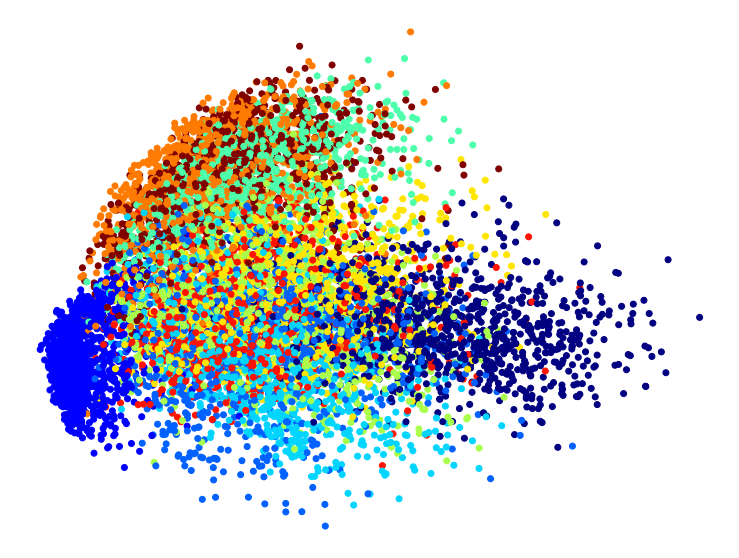

In [68]:
plt.figure(figsize=(13,10))
plt.scatter(x=X_pca_reduced[:,0], y=X_pca_reduced[:,1], c=y_train, cmap='jet')
plt.axis('off')


In [69]:
from sklearn.manifold import LocallyLinearEmbedding


In [70]:
start = time.time()
X_LLe = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_train)
end = time.time()
print(f'total time: {end-start}')

total time: 19.857675552368164


(-0.023863182557086447,
 0.008993561536729786,
 -0.019861932562467176,
 0.019114530917287924)

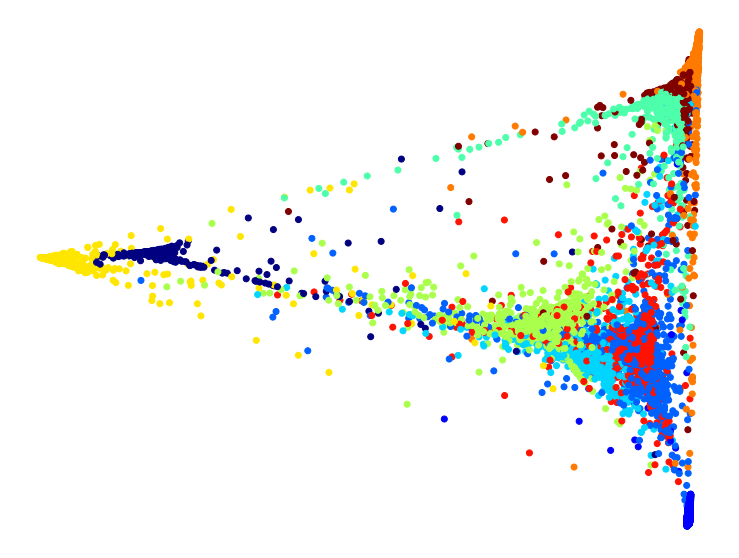

In [71]:
plt.figure(figsize=(13,10))
plt.scatter(x=X_LLe[:,0], y=X_LLe[:,1], c=y_train, cmap='jet')
plt.axis('off')

In [76]:
from sklearn.pipeline import Pipeline

ppl = Pipeline([
    ('PCA', PCA(n_components=0.95, random_state=42)), 
    ('LLE', LocallyLinearEmbedding(n_components=2, random_state=42))
])

total time: 15.516356706619263


(-0.023653904735891032,
 0.009624340062291226,
 -0.02237483420509827,
 0.01846466800314852)

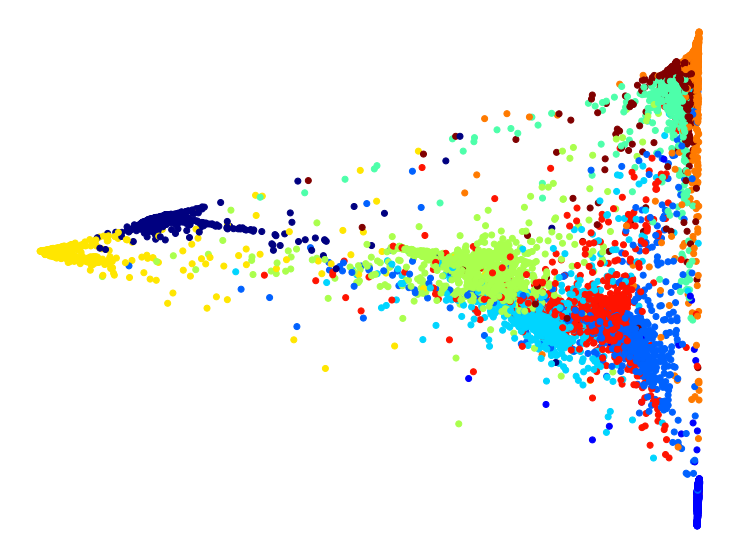

In [77]:
start = time.time()
X_reduced = ppl.fit_transform(X_train)
end = time.time()
print(f'total time: {end-start}')
plt.figure(figsize=(13,10))
plt.scatter(x=X_reduced[:,0], y=X_reduced[:,1], c=y_train, cmap='jet')
plt.axis('off')

# ------------------------------------------